In [1]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /opt/conda/lib/python3.7/site-packages (4.12.0)


In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


# Author Information:  
**Name:** Salo Elia  
**ID :** 209710243  
**Link :** https://www.kaggle.com/saloelia

# Explanation:

In my first ever ML project I will be investigating the sinking of the Titanic and will try to build the best model to classify the passengers who survived and the passengers who did not.  

'The Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history'(from Wikipedia).  

When first thinking about this disaster , I assume that although luck may have played a role in some deaths and surviving incidents , there were still groups that had a better chances of surviving the crash: High-Society people , childrens and womens.  But maybe there are even more features that gave an advantage to some groups in surviving? For example : Considering the time of the crash(late night) , maybe passengers who were sleeping in Cabins who were closer to the Ice Berg crash , had a lower chances to survive? There are a lot of features and options in this case , and we will need to investigate the data more the answer the questions.


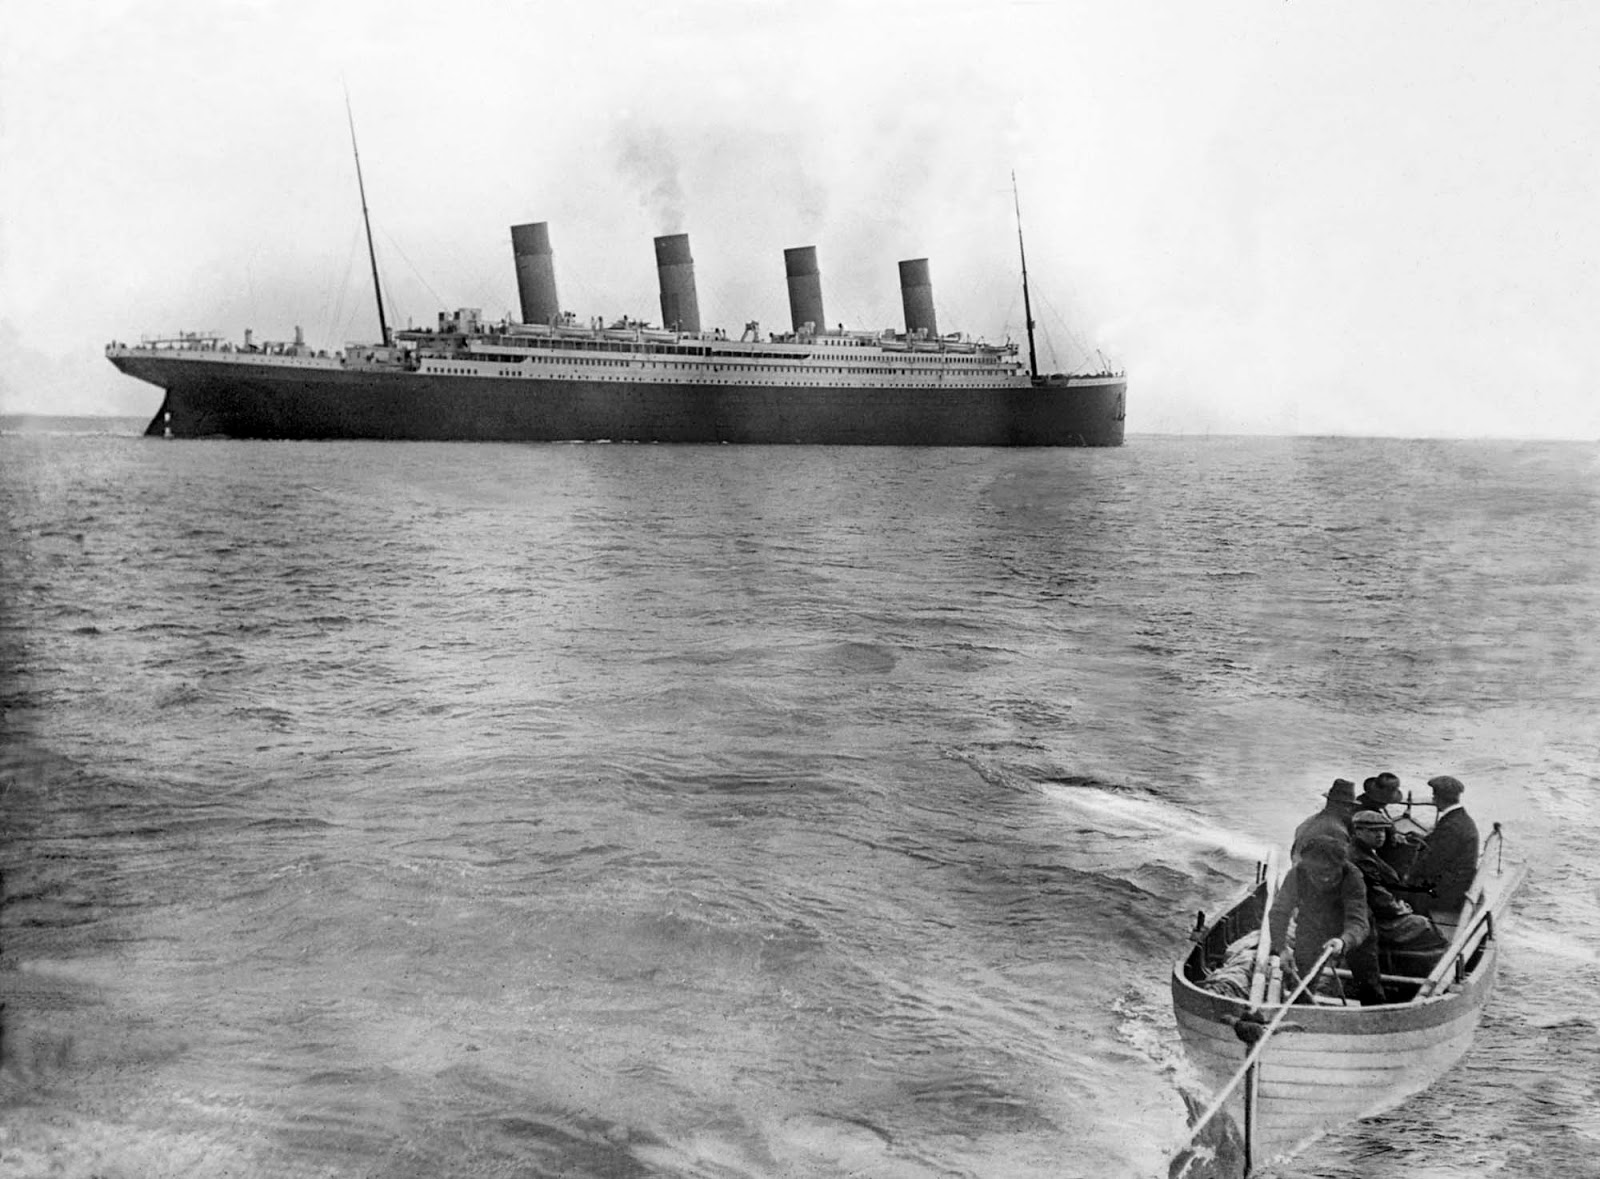

The last photo known of the Titanic

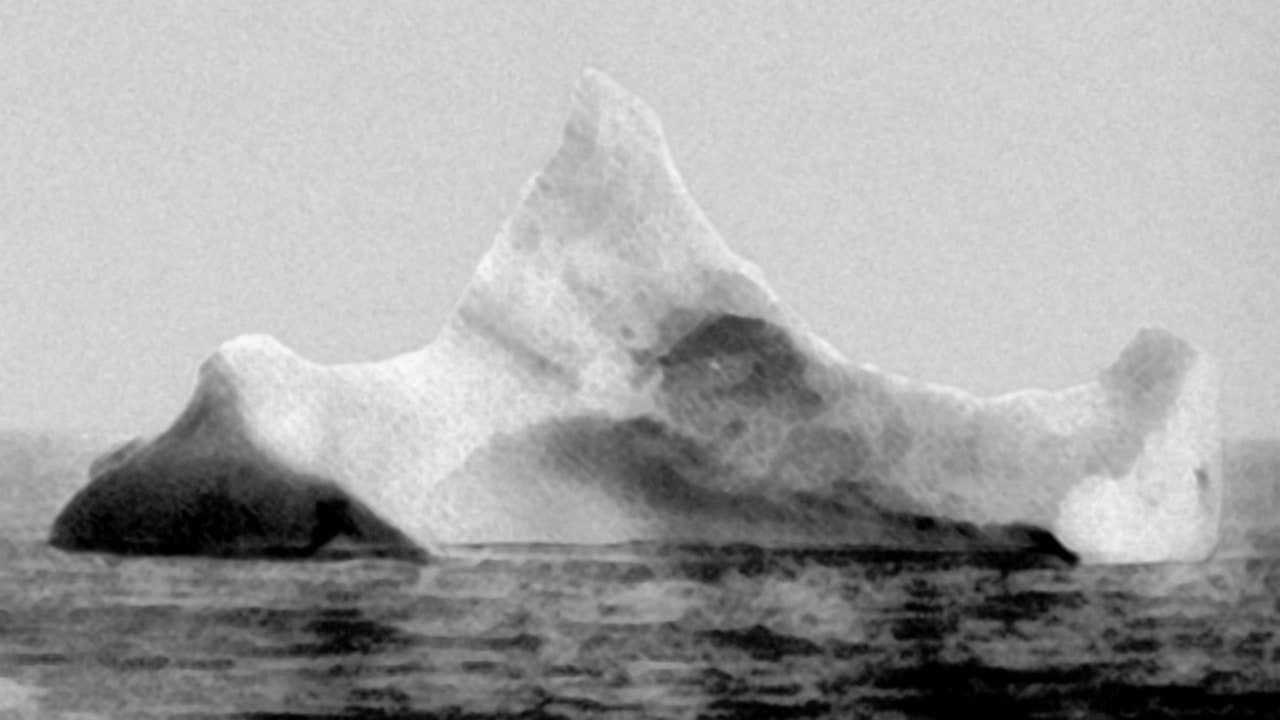

The Iceberg believed to hit the Titanic

# Data Information and Investigation:

First, we will take a quick look at the Dataset that we are going to work with  :

In [80]:
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import math
# import numpy as np
# import seaborn as sns
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_for_kaggle = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Great!  
Now we will check for each feature the NULLs value:  

In [81]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


For all features , exepct from the Cabin,Age and Embarked features ,there are no missings values.  
**The Age feature**  
Intuitive ,the age feature seems to be correlative to the Survival rate and worth enough to Investigate. But first, we will need to check the percentage of non-null values in that feature. If the non-null rate is low , maybe we should think twice about concluding this feautre to our model.        
Fortunately , the percentage of non-null values is 80% (714/819),that rate is pretty high. For now, this feature stays with us. I Will later fill those null values.   
**The Cabin feature**  
The Cabin feature maybe could be a good correlative feature to the Survival rate.  Maybe the Cabings who were closer to the Ice-berg hit had a lower chance of surviving? Unfortunately, we cannot answer this Question with a high rate of percentage. Only 204 from 891 values are concluded in the Cabin features , that is almost 80% of missing values.  For now, I diceded to not include this feature in our model.  
**The Embarked feature**  
Only two missing values. Not something to worry about.

In [82]:
train_df = train_df.drop('Cabin',1)
test_for_kaggle = test_for_kaggle.drop('Cabin',1)

## More features to drop:

In [83]:
train_df = train_df.drop('Ticket',1)
train_df = train_df.drop('PassengerId',1)
train_df = train_df.drop('Name',1)
test_for_kaggle = test_for_kaggle.drop('Ticket',1)
passengerId_test = test_for_kaggle['PassengerId']
test_for_kaggle = test_for_kaggle.drop('PassengerId',1)
test_for_kaggle = test_for_kaggle.drop('Name',1)


I decided to drop the Ticket,PassengerId and Name features:
1. Ticket : It seems to be a randomal string that do not have any conection to any of the features and especially to the Survival rate.  
2. PassengerId: An ordinary number that do not have any conection to the Survival rate , as with the Ticket Feature.  
3. Name: I decided to drop it from our model although there may be a connection between the honorifics(Mr,Mrs,Master..) and the Survival rate.

# Colleration between the features and Survival  
For the begining , we will try to see wich of the features has a good colleration with the Survival rate. Later on, we will investigate more of those features. 

## Sex and Survival 


In [84]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


It seems that there is a significant colleration between the two:  
74% of the Women aboard had survived the crash , while only 18% of the Man had!    

## Pclass and Survival

In [85]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Well ,  pretty sucks for the 3st: 63% of the 1st class aboard had survived , 47% of the 2st and only 24% of the 3st .

## Age and Survival

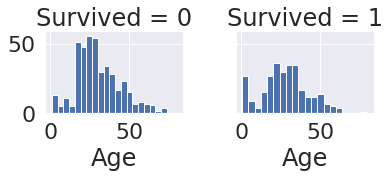

In [86]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

If we will take a look at the non-survival graph(Survived=0), it seems that if you were between the age 20 to 40 , you would proabaly be dead. But in the other hand, if we will take a look at the survival graph(Survived=1) , your chances to survive would grow if your age was ****still**** between 20 to 40 . This is proabaly beacuse most of the Passengers aboard were between those ages. The chances of survivng would grow too if your age was between 0-15 and 60 above. 
Age could be a good feature for our model , but there is not a significant colleration between this feature to the survival rate. 

## Parents/Childrens,Sibilngs numbers and Survival 

In [87]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [88]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


No colleration between the Numbers of Parents/childrens , sibilngs and Survival rate.  
Maybe we could make from those two feature a single feature that will indicate a colleration , or simply delete them.

## Fare and Survival

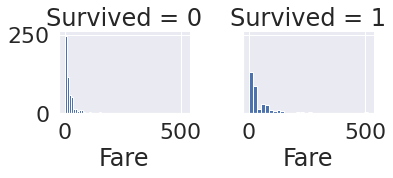

In [89]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=30)

Like the Age graphs , the chances of a passenger with a 0-100 rate of Fare to not survive are pretty high , but also to survive.There is a larger chance for a passenger to survive if the his Fare rate is above 100 , but still we cannot indicate a passenger survivness or non-survivness only by the Fare Feature.  


## Embarking and Survival

In [90]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


At first sight,this feature may look Unnecessary for our t-target , but after meassuring, it seems that the Pasengers who imbarked at C, had a better chance of Surviving the crash.Maybe there is something "special" about the C station? This is pretty Strange and not intuitive. We will need to investigate this feature more in order to discover the reason for this rating.

# Advanced Investigation and Testing Models

Till now, we only investigated the colleration between the features and the t-target feature, The Survival Feature.  
Now we will make one step foward in our Data Investigation.

## Changing the Categorial data 'Sex' and 'Embarked' to Numerical   


In [91]:
replacement = {
    'C': 0,
    'Q': 1,
    'S': 2
}

train_df['Embarked'] = train_df['Embarked'].apply(lambda x: replacement.get(x))
test_for_kaggle['Embarked'] = test_for_kaggle['Embarked'].apply(lambda x: replacement.get(x))

replacement1 = {
    'male': 0,
    'female': 1
}

train_df['Sex'] = train_df['Sex'].apply(lambda x: replacement1.get(x))
test_for_kaggle['Sex'] = test_for_kaggle['Sex'].apply(lambda x: replacement1.get(x))

In [92]:
test_for_kaggle

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,2
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,2
416,3,0,NaN,0,0,8.0500,2


In [93]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0
887,1,1,1,19.0,0,0,30.0000,2.0
888,0,3,1,NaN,1,2,23.4500,2.0
889,1,1,0,26.0,0,0,30.0000,0.0


## The Heatmap for now:

In [94]:
def heatMap(df):
    plt.figure(figsize=(12,10))
    cor = np.abs(df.corr())
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
    plt.show()

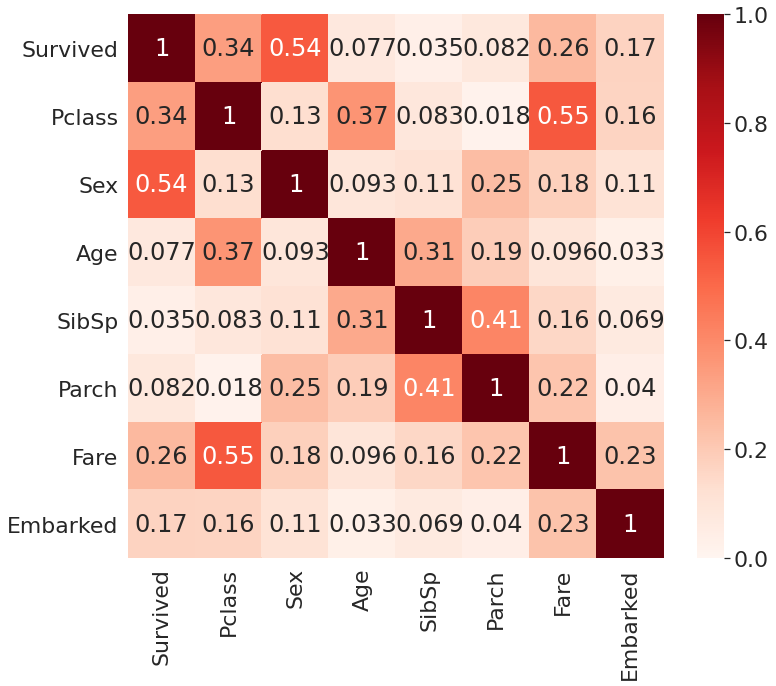

In [95]:

heatMap(train_df)


**The Colloration rate for now:**   
Sex > Pclass > Fare > Embarked > Parch > Age > SibSp

# ****My Plan****

For a good understanding and investigation of the Data ,I will make several tests. In every test I will make a different change to the model. With this kind of stradegy , I can see the development and the process that the model is doing.    
  
But before the 1st test , I will have to do several things:  
* Fill the values in the Age and Embarked features  
* Compare the heat-map before and after the fill  
* Change the Categorial features in the data of the test to Numerical (Sex and Embarked)  
* Drop the features from the test data that I dropped in the train data  
* Checking null values in the test data and fill it


In [96]:
train_df = train_df.interpolate()
test_for_kaggle = test_for_kaggle.interpolate()

This method simply fill all the NULL values with a mean between the rows.  
For example: if in row 1 there is a value of 10 in a column ,in row 2 NULL and in 3 a value of 3 , the NULL value in row 2 will be 15.  
This method will help us to fill the NULL values by the mean(almost) and hopefully wont change significant the Colleration in the data.

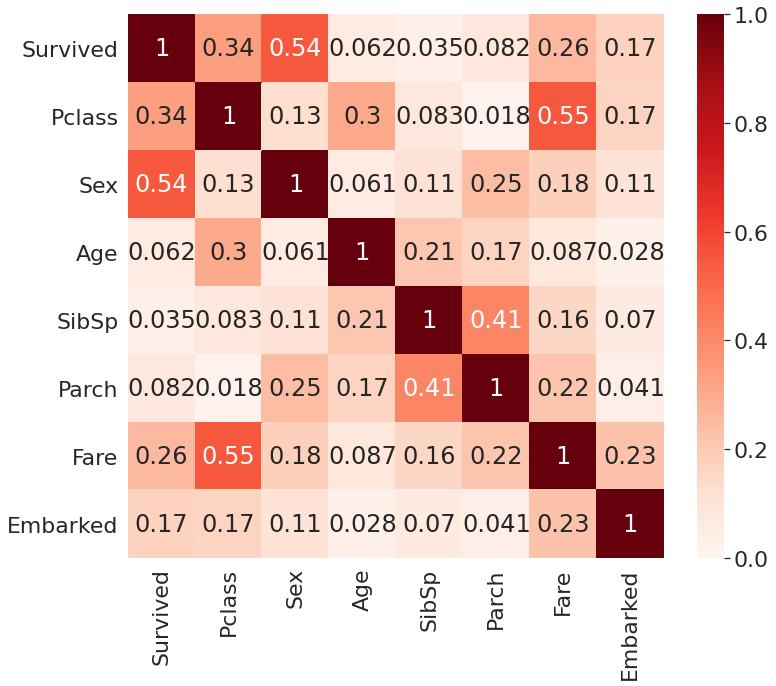

In [97]:
heatMap(train_df)

The top 2 rating of difference I can see :  
* Between the Age and  SibSp features with a rate of -0.1
* Between the Age and Pcaass features with a rate of -0.07
  
I assume that both of them are not a significant difference and thats what I excpected.Since there is no a big difference with the collerances , I feel comfortable to work with those data values. 


In [98]:
t = train_df['Survived']
train_df_copy = train_df.copy()
train_df_copy.drop('Survived',1,inplace=True)

x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)

# 1st Model

Lets start our 1st test by just not doing any changes in our features. Lets see the results: 

## Linear Rigression and Validation method

In [99]:
def SGD(x_train,t_train,x_test,t_test,test_for_kaggle):
  SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(),
                                   linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
  y_train_prob = SGD_cls.predict_proba(x_train)
  y_test_prob = SGD_cls.predict_proba(x_test)
  y_train = SGD_cls.predict(x_train)
  y_test = SGD_cls.predict(x_test)
  print('Accuracy score on train', SGD_cls.score(x_train, t_train))
  print('Accuracy score on test', SGD_cls.score(x_test, t_test))
  print()
  print('CE on train', metrics.log_loss(t_train, y_train_prob))
  print('CE on test', metrics.log_loss(t_test, y_test_prob))
  y_final = SGD_cls.predict(test_for_kaggle) 
  return y_final



In [100]:
y_final = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.8075842696629213
Accuracy score on test 0.7597765363128491

CE on train 0.4289910427305522
CE on test 0.49553332310724135


In [101]:

output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_final})
output.to_csv('submission1_new.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## 1st model score = 0.767  
Thats not bad result , but I will try to make it better.

# 2st Model 

In my 2st model I will change a little bit the model. I see fit to start with the two features: **Parch** and **SibSp**. 

There is of course , not a great colleration between them and the Survived feature - it can be seen on the Heat-map and in the frequencies of Survival concerning to the Numbers of Parents/Childrens and Sibilngs .  
The reason I choosed them , it is beacuse of the fact that they are related to an other feature ,that may help us find a better colleration to our t-target , the **Family size**.  Each of them alone(the Parch and SibSp features) , dont have a great colleration with the 'Survived' , but maybe their **combination** has? 

In [102]:
def familySizeFeature(df):
 parch_new = df['Parch']
 sibsp_new = df['SibSp']
 df.drop('Parch',1,inplace=True)
 df.drop('SibSp',1,inplace=True)
 df.insert(2,'FamilySize',parch_new + sibsp_new + 1)

familySizeFeature(train_df)
familySizeFeature(test_for_kaggle)
familySizeFeature(train_df_copy)

In [103]:
train_df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


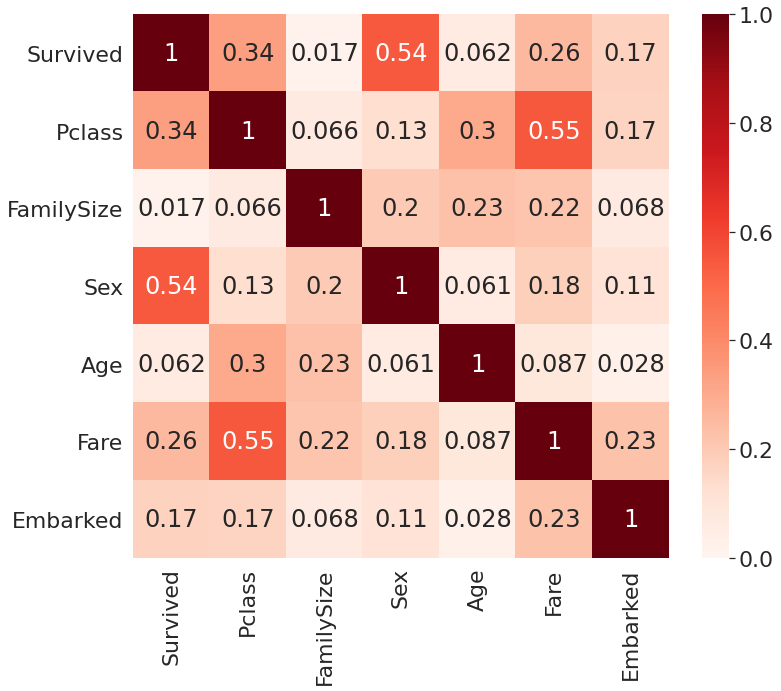

In [104]:
heatMap(train_df)

Well, the Family Size feature is even less collerable than the Parch and SibSp with the Survived feature.  
But , if we can ignore the 7,5 and 6 in the Frequency table above, we can see a good colleration between the 'FamilySize' and the 'Survived' : 4,3,2,1 so that 1 has the less chances to survive.

In [105]:
train_df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

The percentage of the 7,6,5,11,8 Family Size related to the whole data:
* 7 is only 0.013% of the data
* 6 is only 0.024% of the data
* 5 is only 0.016% of the data
* 11 is only 0.0007% of the data
* 8 is almost equal to the rate of 11.  
Those rates are pretty low,and even the whole combination of them are lower than the 3 FamilySize rate. The 4 FamilySize rate is low too , only 0.032% of the data. So I assume that we can simply ignore those rows(4,5,6,7,11,8) and imagine a frequency table without them.  
If we do so , we can see a good coleration between FamilySize and Survive.  
The chances of you to survive are pretty much the same if you had a Family Size of 2 and 3. 4 is way higher, but again, we only have 29 families with a size like that, so I am not amazed by this rate.  
Considering that the survival rate are pretty much the same between 2 and 3 (0.55) , and considering that the survival rate in group 1 , who is the largest of all groups(537!) is only 0.3 , I can assume that maybe there is a conection between the  survivness of the passenger and the fact that he was **alone**.  
I will make a new binary feature, from the FamilySize feature , that will indicate if the passenger was alone or not, and I will tets its colleration with the Survival feature.

In [106]:
for dataset in [train_df,test_for_kaggle,train_df_copy]: #for x_test and x_train too
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df = train_df.drop('FamilySize',1)
test_for_kaggle = test_for_kaggle.drop('FamilySize',1)
train_df_copy = train_df_copy.drop('FamilySize',1)

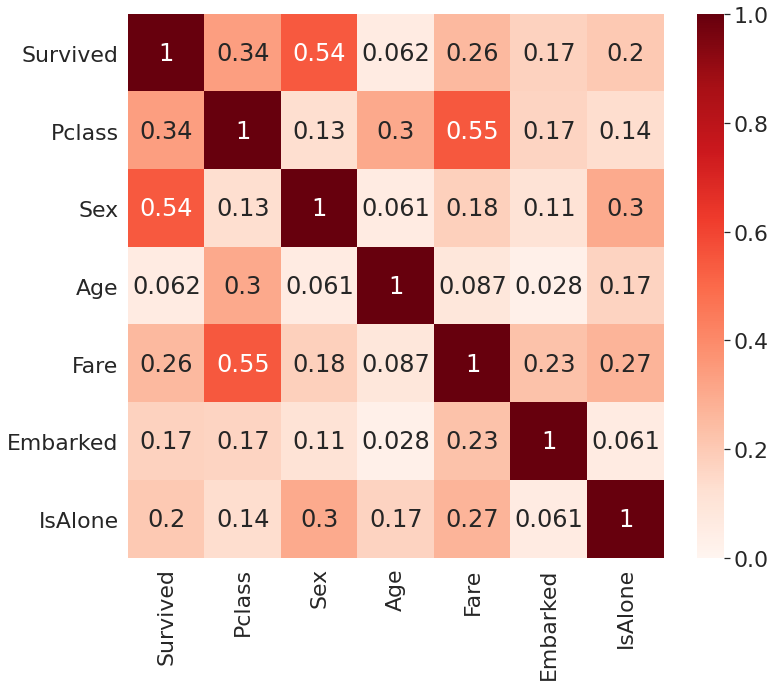

In [107]:
heatMap(train_df)

In [108]:
train_df[["IsAlone", "Survived"]].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


There is an Improvment. 
Lets see the results of the Validation and Test.

In [109]:
second_train_df = train_df.copy()
second_test_df = test_for_kaggle.copy()

## Linear Rigression and Validation method

In [110]:
x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)
y_test = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.7921348314606742
Accuracy score on test 0.7541899441340782

CE on train 0.4390843595744004
CE on test 0.4951617171040878


There is not a big difference in the validation. Lets see with the test.

In [111]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_test})
output.to_csv('submission2_new.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## 2st Model score = 0.768

Same result. Lets continue.

# 3st Model 

Maybe the 'IsAlone' feature is disturbing the Model. Lets try a test without the 'IsAlone' feature:

In [112]:
isAlone_df = train_df['IsAlone']
t_isAlone = test_for_kaggle['IsAlone']
train_df.drop('IsAlone',1,inplace=True)
test_for_kaggle.drop('IsAlone',1,inplace=True)
train_df_copy.drop('IsAlone',1,inplace=True)

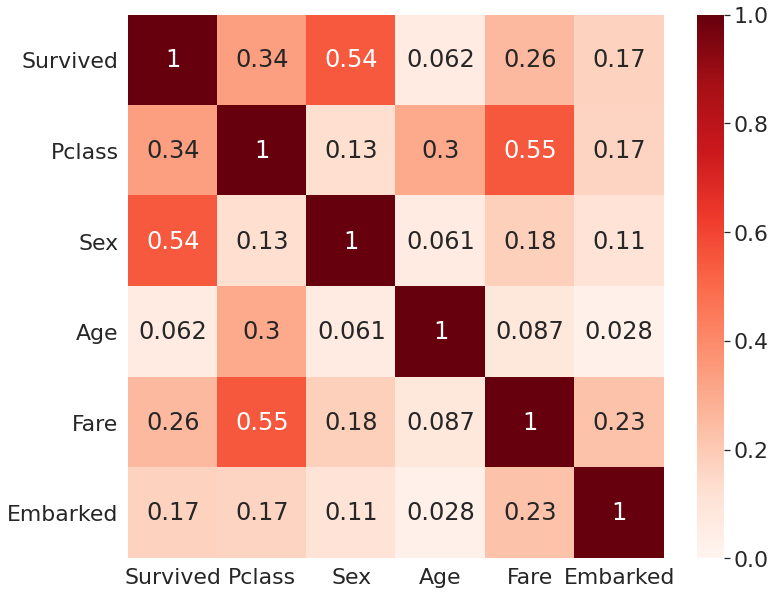

In [113]:
heatMap(train_df)

In [114]:
x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)
y_test = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.7949438202247191
Accuracy score on test 0.7653631284916201

CE on train 0.43878633315736726
CE on test 0.49759922113884836


In [115]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_test})
output.to_csv('submission3_new.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## 3st Model Score = 0.763

Almost the same as with the 2st Model.

# 4st Model

This Model will focus on the Investigation of the 'Embarked' feature. I will discover why the passengers who imbarked at Q and S had a less chance to survive. I assume that it is probably beacuse of the difference amount of the people who imbarked on those Stations . If this is the reason , I will decide to drop this feature . Why? Beacuse it does not really indicade the passenger's survival rate and our model will be "confused" in real test. If most of the people imbarked at C , it is crearly that most deaths held in this class ,considering the fact that most of the people died in the crash - only  34% had urvived. 

First I will return the 'IsAlone' feature:

In [116]:
train_df.insert(5,'IsAlone',isAlone_df)
train_df_copy.insert(5,'IsAlone',isAlone_df)
test_for_kaggle.insert(5,'IsAlone',t_isAlone)

Now let's see how much passengers imbarked at each station:

In [117]:
train_df['Embarked'].value_counts()

2.0    644
0.0    168
1.0     78
0.5      1
Name: Embarked, dtype: int64

As I assumed , most of the people (70%) imbarked at the C(2) station , and that is the reason the percentage of surviving in this station is the lower. 

In [118]:
embarked_df = train_df['Embarked']
train_df.drop('Embarked',1,inplace=True)
test_for_kaggle.drop('Embarked',1,inplace=True)
train_df_copy.drop('Embarked',1,inplace=True)

Let's test the model without the 'Embraked' feature:

## Linear Rigression and Validation method

In [119]:
x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)
y_test = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.7921348314606742
Accuracy score on test 0.7486033519553073

CE on train 0.4415987274931439
CE on test 0.5030133894512737


The results of the validation remains almost the same.  
I will not sumbit this model yet and I will try to do another idea , but now with the 'Age' feature:

We saw that most of the people who died were in the ages 20 to 40. I have an idea of dividing the whole Age feature in to a couple of age groups.For investigatin, let's divide it in to 5 groups and compared each of the with its survival rate:

In [120]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.525424
1,"(16.336, 32.252]",0.350917
2,"(32.252, 48.168]",0.372470
3,"(48.168, 64.084]",0.435897
4,"(64.084, 80.0]",0.083333


We can see crearly that most of the people who were in the ages 16 to 48 had lower chances to survive (35%-37%). We can assume here too , that it is beacuse of the fact that most of the passengers were between those ages.  
We can relate this feature as we related to the 'Embarked' and drop it , but I beleive there is a difference between them :  
As the 'Embarked' feature has nothing to do with the survival rate of a passenger, and we confirmed there is nothing 'special' about the C station , the 'Age' feature may have a colleration with the 'Survived'. Maybe the passengers who were under 16 had a priority on being rescued first? Maybe this is the same with the Older passengers , who were older than 48?  This is why I decided to divide the 'Age' feature to 3 groups:  
0 - under 16 - 1st survival rate  
1 - more than 48 - 2st survival rate  
2 - between 16 to 48 - 3st and last survival rate

In [121]:
for dataset in [train_df,test_for_kaggle,train_df_copy]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] < 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 48), 'Age'] = 1
    

In [122]:
train_df['Age'].value_counts()

2.0    673
0.0    118
1.0    100
Name: Age, dtype: int64

The passengers who were between 16 to 48 were of course the majority in the ship.

In [123]:
train_df[["Age", "Survived"]].groupby(['Age'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Age,
0.0,0.525424
1.0,0.420000
2.0,0.353640


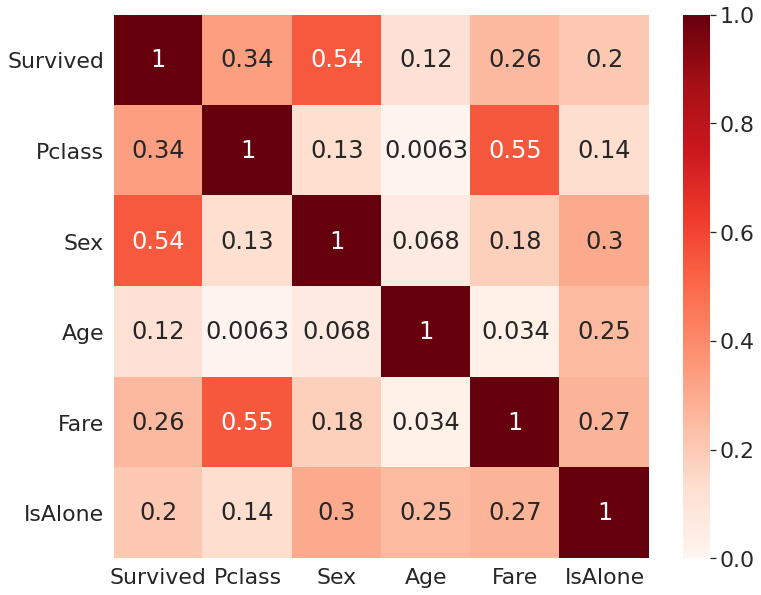

In [124]:
heatMap(train_df)

There is still unfortunately not a significant collerance with 'Age' and 'Survived' although there is a small improvment.

## Linear Rigression and Validation method

In [125]:
x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)
y_test = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.7949438202247191
Accuracy score on test 0.770949720670391

CE on train 0.44925422913815755
CE on test 0.5006472360953108


In [126]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_test})
output.to_csv('submission4_new.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## 4st Score = 0.75837

No big difference.

## 5st Model

I will try to test a model without the 'Age' and 'IsAlone' features:

In [127]:
age_df = train_df['Age']
train_df.drop('Age',1,inplace=True)
train_df_copy.drop('Age',1,inplace=True)
test_for_kaggle.drop('Age',1,inplace=True)

In [128]:
train_df.drop('IsAlone',1,inplace=True)
train_df_copy.drop('IsAlone',1,inplace=True)
test_for_kaggle.drop('IsAlone',1,inplace=True)

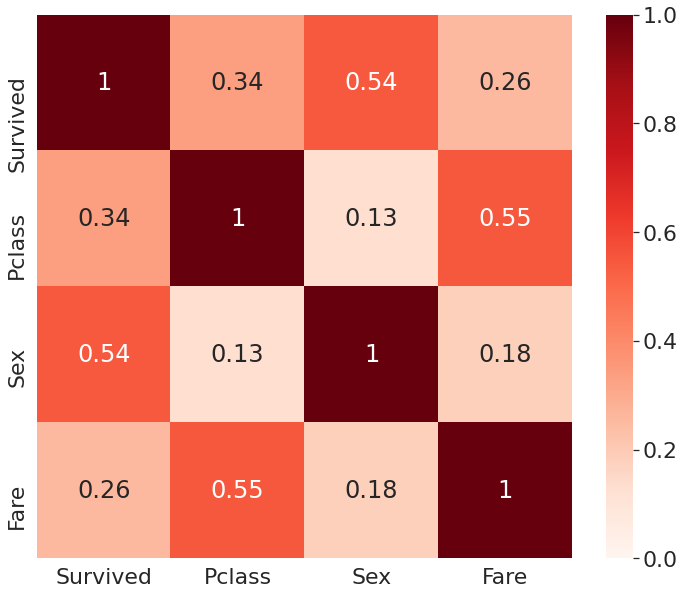

In [129]:
heatMap(train_df)


## Linear Rigression and Validation method

In [130]:
x_train, x_test, t_train, t_test = model_selection.train_test_split(train_df_copy, t, test_size=0.2, random_state=2)
y_test = SGD(x_train,t_train,x_test,t_test,test_for_kaggle)

Accuracy score on train 0.7949438202247191
Accuracy score on test 0.7653631284916201

CE on train 0.45362783619524427
CE on test 0.5110389859283411


In [131]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_test})
output.to_csv('submission5_new.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## 5st model socre = 0.76555

Still ,no difference

# My sumbissions and Leader board place

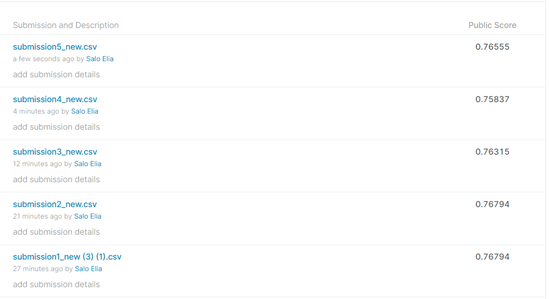

Best Score = 0.768 from 1st and 2st model

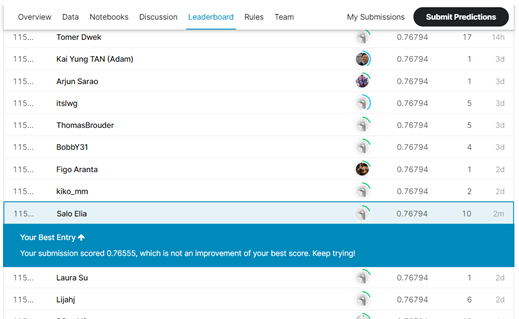

# Conclusion

I can say,in conclusion ,that my mission to improve the first model , has failed. There are obviously some things I did not notice in solving and improving the model and I guess that is beacuse of my lack of experience in the ML world. I could still think about other Ideas and make some other changes like multipling some features or dividing them to smaller groups as I did with the 'Age' feature for example , but unfortunately I dont have much time(student Life).   
Although I could not improve the first model significantly , I can say crearly that I have learned a lot from my first ML work and I am looking foward to explore more of the ML world , and surely will be smarter on the next projects I will be making.  

# Exercise 3(continue)

After learning more tools and new options of the ML World in class , I will use those tools in order to increase the Classifying rate.  
The new tools featured in the Exercise:  
* Classifying the data with KNN and NBC (I could choose LDA too but it wont be on our test , so I prefer to practice materials that will be on the test)  
* Validating the models with CV methods  
* Using Features Selection  
* Searching for the best hyper-parameters with Grid Search(I could choose the Random Search but the Grid one has better accuracy)  
* Displaying Train vs Validation Confusion Matrix and the KPI`s statics 
  
Note that I will not be investigating more the Data(maybe I will change one thing or two). I will continue from the 2nd Model .

In [132]:
train_df = second_train_df
test_df = second_test_df

In [133]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,2.0,0
1,1,1,1,38.0,71.2833,0.0,0
2,1,3,1,26.0,7.9250,2.0,1
3,1,1,1,35.0,53.1000,2.0,0
4,0,3,0,35.0,8.0500,2.0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,2.0,1
887,1,1,1,19.0,30.0000,2.0,1
888,0,3,1,22.5,23.4500,2.0,0
889,1,1,0,26.0,30.0000,0.0,1


In [134]:
t = train_df['Survived']
train_df.drop('Survived',axis=1,inplace=True)

In [135]:
from sklearn.compose import ColumnTransformer
from tqdm.auto import tqdm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import log_loss

## The Feature Selection Method

In [136]:
def feature_selection(X,t,k=None,p=None,repeated=None):
  numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
  categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
  all_cols = categorical_cols.tolist() + numerical_cols.tolist()
  ct = ColumnTransformer([
              ("encoding", OrdinalEncoder(), categorical_cols),
              ("standard", StandardScaler(), numerical_cols)])
  X_encoded = pd.DataFrame(ct.fit_transform(X, t), columns=all_cols)
  if k is not None and repeated is None:
    selector = RFECV(SGDClassifier(loss='log',random_state=1), cv = KFold(n_splits=k, shuffle=True, random_state=1)).fit(X_encoded, t)
  elif k is not None:
    selector = RFECV(SGDClassifier(loss='log',random_state=1), cv=RepeatedKFold(n_splits=k, n_repeats=repeated, random_state=1)).fit(X_encoded, t)
  elif p is not None:
    selector = RFECV(SGDClassifier(loss='log',random_state=1), cv=LeavePOut(p)).fit(X_encoded, t)
  else:
    raise ValueError('you need to specify k or p in order for the cv to work')

  display(X_encoded.loc[:, selector.support_])

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
  fig.update_xaxes(title_text="Number of features selected")
  fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
  fig.show()
  return X_encoded.loc[:, selector.support_]

Note: I had to do the RFECV with a SGDClassifier and not KNN or NBC , otherwise I would recieve an Error.

Lets do a features selection on the data set:

Using 10 Fold woth 10 reps:

In [137]:
k_fold_col = feature_selection(train_df,t,10,10)

,Pclass,Sex,Age,Embarked
0,0.827377,-0.737695,-0.556050,0.589013
1,-1.566107,1.355574,0.595481,-1.937149
2,0.827377,1.355574,-0.268167,0.589013
3,-1.566107,1.355574,0.379569,0.589013
4,0.827377,-0.737695,0.379569,0.589013
...,...,...,...,...
886,-0.369365,-0.737695,-0.196196,0.589013
887,-1.566107,1.355574,-0.771962,0.589013
888,0.827377,1.355574,-0.520064,0.589013
889,-1.566107,-0.737695,-0.268167,-1.937149


Using LOO with 10 reps:

In [138]:
loo_col = feature_selection(train_df,t,k=None,p=1,repeated=10)

,Pclass,Sex
0,0.827377,-0.737695
1,-1.566107,1.355574
2,0.827377,1.355574
3,-1.566107,1.355574
4,0.827377,-0.737695
...,...,...
886,-0.369365,-0.737695
887,-1.566107,1.355574
888,0.827377,1.355574
889,-1.566107,-0.737695


The Scores remains almost the same but the 10 Fold has a little advantage. Lets Choose the Columns of the 10 Fold:  

In [139]:
x_model = pd.DataFrame(train_df,columns=k_fold_col.columns)

In [140]:
test_model = pd.DataFrame(test_df,columns=k_fold_col.columns)

# **KNN**

## Grid Search for ideal Number of Neighbors and Algorithm 

In [141]:
X_normalized = StandardScaler().fit_transform(x_model)
arr_X_normalized = np.asarray(X_normalized) 

Grid search CV with 10 Fold:

In [142]:
hyper_parameters = {
    'algorithm': ('auto','ball_tree','kd_tree','brute'),
    'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters,cv=10).fit(arr_X_normalized, t)
print('Score', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Score 0.8148189762796504
best params {'algorithm': 'auto', 'n_neighbors': 14}


Best Number of Neighbors for KNN Model: 14  
CV Score: 0.81  
Algorithm: Auto

# NBC

NBC model with 10 Fold: 

In [143]:
from sklearn.naive_bayes import GaussianNB 

print('MultinomialNB score:', cross_val_score(GaussianNB(), x_model, t, cv=10).mean())


MultinomialNB score: 0.7789138576779027


Here we have a score of 0.77 , the KNN had a score of 0.8. This indicate to us that maybe the KNN model will be a better Model for Classification in this case.

# KPI Statics and Confusion Matrix

I will show the KPI statics of each model (KNN and NBC) and its Train and Validation Matrix. We can after analyize those matrix, check the difference of each model and draw conclusions.  
I will split the data to : 20% of Validation and 80% to Train. 

In [144]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(x_model, t, test_size=0.2, random_state=1)

## KNN Confusion Matrix Model

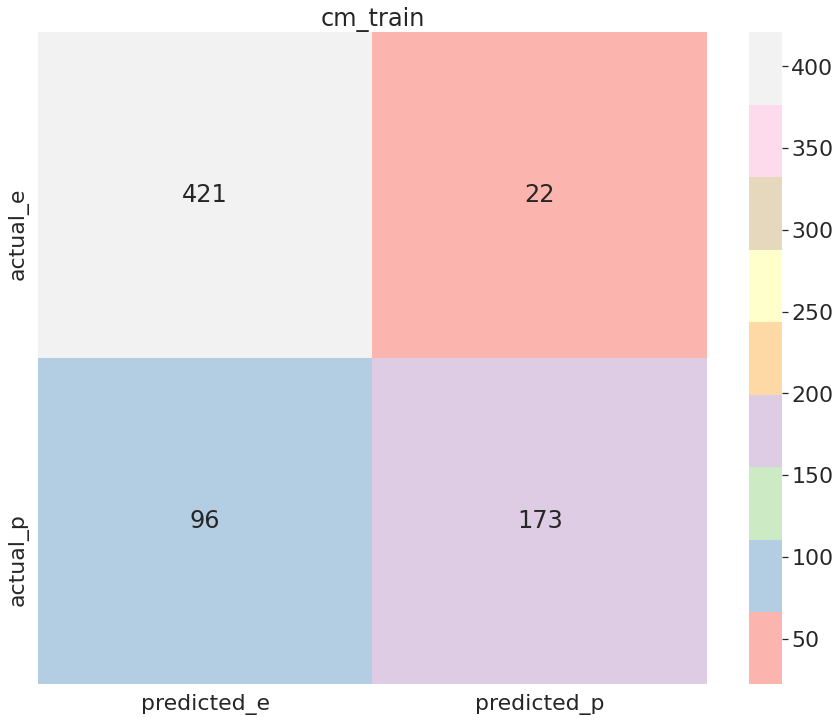

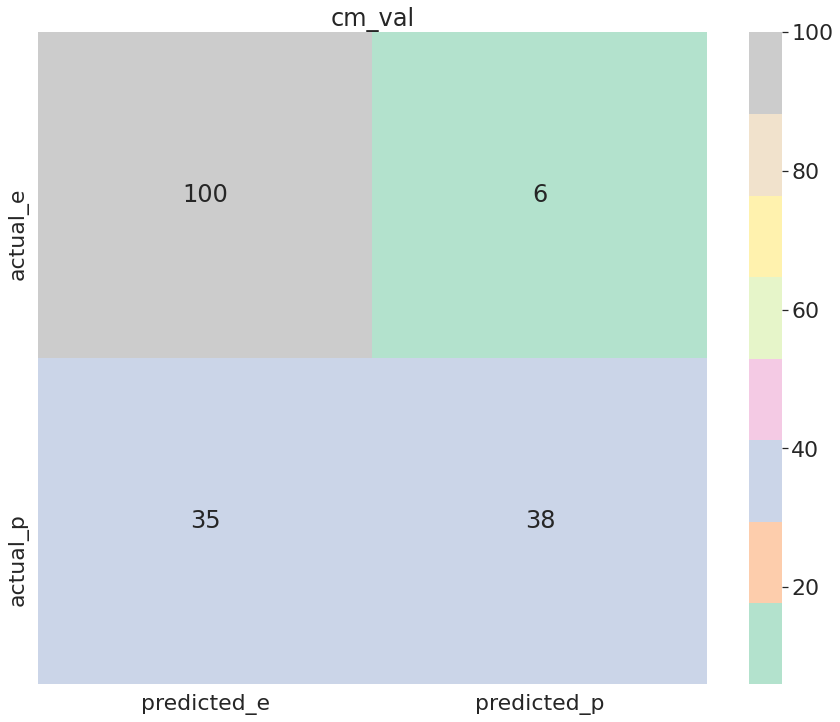

In [145]:
from sklearn.metrics import confusion_matrix

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
#categorical_cols = x_model.select_dtypes(include=['object', 'bool']).columns
encoder = ColumnTransformer([
    ("standard",make_pipeline(StandardScaler()),numerical_cols)] )

model_knn = make_pipeline(encoder, KNeighborsClassifier(n_neighbors=14)).fit(X_train,t_train)
y_train = model_knn.predict(X_train)
y_val = model_knn.predict(X_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, y_val)

cm_train_df = pd.DataFrame(cm_train, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])
cm_val_df = pd.DataFrame(cm_val, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])

sns.set(font_scale=2)
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()
print()
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
fig.set_title("cm_val")
plt.show()


## KPI Statics (KNN):

In [146]:
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print(f'Train: Accuracy {(tn_train + tp_train)/(tn_train + tp_train + fp_train + fn_train):4}, Precision {tp_train/(tp_train+fp_train):4}, Recall {tp_train/(tp_train+fn_train):4},Specificity {tn_train/(tn_train + fp_train):4}')
print(f'Val: Accuracy {(tn_val + tp_val)/(tn_val + tp_val + fp_val + fn_val):4}, Precision {tp_val/(tp_val+fp_val):4}, Recall {tp_val/(tp_val+fn_val):4},Specificity {tn_val/(tn_val + fp_val):4}')


Train: Accuracy 0.8342696629213483, Precision 0.8871794871794871, Recall 0.6431226765799256,Specificity 0.9503386004514672
Val: Accuracy 0.770949720670391, Precision 0.8636363636363636, Recall 0.5205479452054794,Specificity 0.9433962264150944


Lets look at the Validation Scores:  
* Accuracy : 77% - that means that the model scored right in 77% of the data validation (true and false)  
* Precision : 86% - among all the predicted survived passengers , 86% of them trully survived
* Recall : 50% - among the real survivors , the model classified right in only 50% of the cases  
* Specificity : 94% - among the real read , the model classified right in 94% of the cases  

We can assume that the model is predicting realy well if a passenger is dead or not , but when dealing with the survivors , there is less accuracy in the predictions. In general , the rating of the KNN Model is 77.

## NBC Confusion Matrix Model

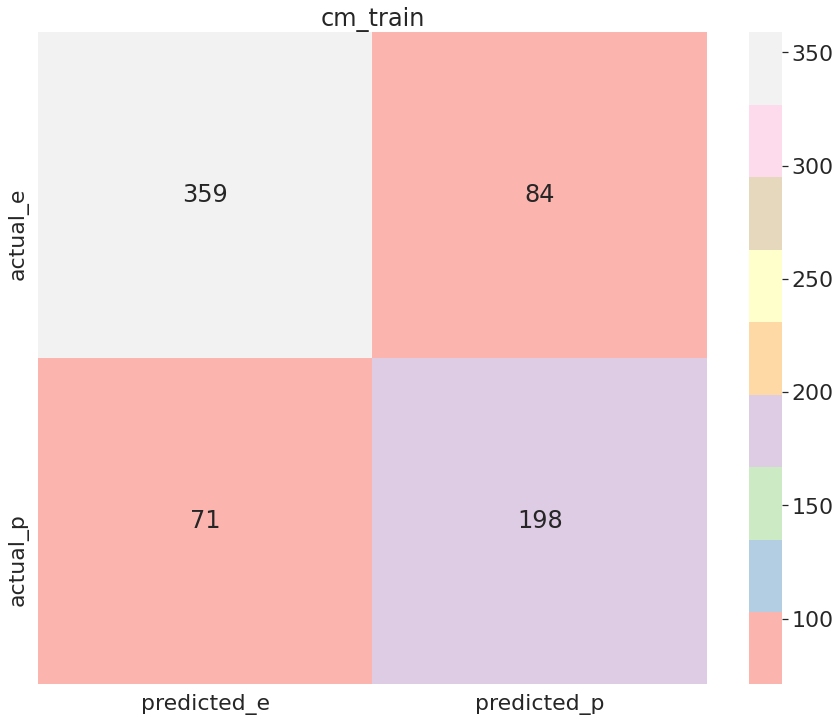

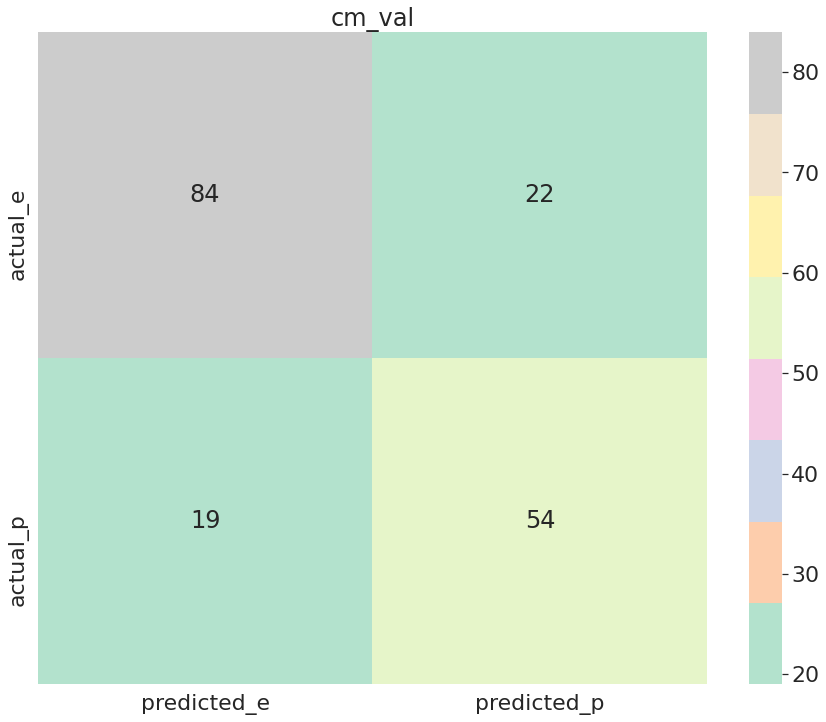

In [147]:
model_nbc = make_pipeline(encoder, GaussianNB()).fit(X_train,t_train)
y_train = model_nbc.predict(X_train)
y_val = model_nbc.predict(X_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, y_val)

cm_train_df = pd.DataFrame(cm_train, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])
cm_val_df = pd.DataFrame(cm_val, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])

sns.set(font_scale=2)
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()
print()
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
fig.set_title("cm_val")
plt.show()

## KPI Statics (NBC):

In [148]:
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print(f'Train: Accuracy {(tn_train + tp_train)/(tn_train + tp_train + fp_train + fn_train):4}, Precision {tp_train/(tp_train+fp_train):4}, Recall {tp_train/(tp_train+fn_train):4},Specificity {tn_train/(tn_train + fp_train):4}')
print(f'Val: Accuracy {(tn_val + tp_val)/(tn_val + tp_val + fp_val + fn_val):4}, Precision {tp_val/(tp_val+fp_val):4}, Recall {tp_val/(tp_val+fn_val):4},Specificity {tn_val/(tn_val + fp_val):4}')


Train: Accuracy 0.7823033707865169, Precision 0.7021276595744681, Recall 0.7360594795539034,Specificity 0.8103837471783296
Val: Accuracy 0.770949720670391, Precision 0.7105263157894737, Recall 0.7397260273972602,Specificity 0.7924528301886793


Lets look at the Validation Scores:  
* Accuracy : 77% - that means that the model scored right in 77% of the data validation (true and false) - same as the NBC Model.  
* Precision : 71% - among all the predicted survived passengers , 71% of them trully survived
* Recall : 74% - among the real survivors , the model classified right in only 74% of the cases  
* Specificity : 79% - among the real read , the model classified right in 79% of the cases  

Comparing to the KNN Model , altought the Accuracy score remains almost the same(77), this Model has a less Rating of Precision and Specificty. Only in the Recall rating is has a better score.  

We can assume that the models are pretty much the same , but the KNN Model proabaly will classify the data better.

# Ensembles

For last, I willl do an BaggingClassifier Ensemble with 20 estimator , in each of the models in order to reduce High Variance errors and improve the Score:

In [149]:
from sklearn.ensemble import BaggingClassifier

bag_fold_model_nbc = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=20, random_state=1, bootstrap=False).fit(X_normalized, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model_nbc.score(X_normalized, t).mean())

Accuracy score for classification:
bag_fold_model 0.7789001122334456


In [150]:
bag_fold_model_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=14), n_estimators=20, random_state=1, bootstrap=False).fit(arr_X_normalized, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model_knn.score(arr_X_normalized, t).mean())

Accuracy score for classification:
bag_fold_model 0.8249158249158249


The KNN has a better score, as excpected.

# Sumbitting the Models

In [151]:
X_normalized_test = StandardScaler().fit_transform(test_model)
arr_X_normalized_test = np.asarray(X_normalized_test) #for knn

In [152]:
y_knn = bag_fold_model_knn.predict(X_normalized_test)

In [153]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_knn})
output.to_csv('submissionKNN.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# KNN Model Score: 0.78708

In [154]:
y_nbc = bag_fold_model_nbc.predict(X_normalized_test)

In [155]:
output = pd.DataFrame({'PassengerId': passengerId_test, 'Survived': y_nbc})
output.to_csv('submissionNBC.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# NBC Model Score: 0.75119

# Conclusion

The KNN has a better score, as excpected. We succeed in the mission and we improved the score to 0.787. It is great to learn and use more tools in order to improve our models and try new things . I am up to learn and explore more of the ML World.

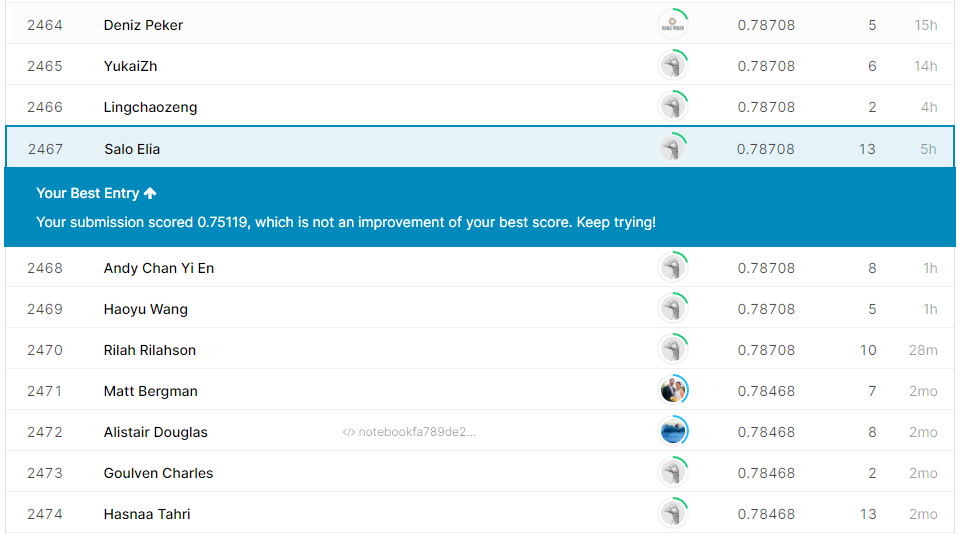

In [163]:
%%shell
jupyter nbconvert --to html /input/ipynb-file/titanic-competition.ipynb

UsageError: Cell magic `%%shell` not found.


## Sources:

https://www.kaggle.com/startupsci/titanic-data-science-solutions  
https://en.wikipedia.org/wiki/Sinking_of_the_Titanic  
